In [1]:
#Dependencies Setup and Data Preparation
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

file_path = [
    Path("Resources/World_Health_Organization/WHO_AAP_2021_v9_2022_08_11.csv")
]
who_air_qual = pd.read_csv(file_path[0])
column_PM25 = "PM2.5 (μg/m3)"
column_NO2 = "NO2 (μg/m3)"
column_reference = "Reference"
who_air_qual.dropna(subset=[column_PM25,column_NO2,column_reference], inplace=True)

who_aq_dropped = who_air_qual.drop(columns=["PM10 (μg/m3)","PM25 temporal coverage (%)", "PM10 temporal coverage (%)", "Number and type of monitoring stations","Version of the database","Status","NO2 temporal coverage (%)"]) \
                             .reset_index(drop=True) \
                             .rename(columns={"ISO3":"Country Code"})

output_csv_path ="Resources/World_Health_Organization/Air_Quality_Data_WHO.csv"
who_aq_dropped.to_csv(output_csv_path, index=False)

who_aq_dropped

,WHO Region,Country Code,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),NO2 (μg/m3),Reference
0,European Region,ALB,Albania,Vrith,2015,13.24,9.57,European Environment Agency (downloaded in 2021)
1,European Region,ALB,Albania,Durres,2016,14.32,24.78,European Environment Agency (downloaded in 2021)
2,European Region,ALB,Albania,Korce,2016,28.64,12.52,European Environment Agency (downloaded in 2021)
3,Western Pacific Region,AUS,Australia,Adelaide,2012,7.30,8.93,EPA South Australia
4,Western Pacific Region,AUS,Australia,Palmerston,2012,12.00,7.00,NEPM
...,...,...,...,...,...,...,...,...
8893,Region of the Americas,USA,United States of America,Santa Maria-Santa Barbara (Ca),2019,4.80,3.45,Environmental Protection Agency
8894,Region of the Americas,USA,United States of America,Stockton-Lodi (Ca),2019,9.30,15.55,Environmental Protection Agency
8895,Region of the Americas,USA,United States of America,Tucson (Az),2019,3.45,13.90,Environmental Protection Agency
8896,Region of the Americas,USA,United States of America,Urban Honolulu (Hi),2019,3.00,7.60,Environmental Protection Agency


In [2]:
#Checking for missing values
print(who_aq_dropped.isnull().sum())

WHO Region          0
Country Code        0
WHO Country Name    0
City or Locality    0
Measurement Year    0
PM2.5 (μg/m3)       0
NO2 (μg/m3)         0
Reference           0
dtype: int64


In [3]:
#Counting the number of unique regions, countries and cities

num_regions = who_aq_dropped["WHO Region"].nunique()
print("Number of WHO Regions: ", num_regions)
num_countries = who_aq_dropped["WHO Country Name"].nunique()
print("Number of Countries: ", num_countries)
num_cities = who_aq_dropped["City or Locality"].nunique()
print("Number of Cities: ", num_cities)


Number of WHO Regions:  6
Number of Countries:  68
Number of Cities:  2109


In [4]:
#Data Exploration - Basic Statistics and Skewness
pm25_mean = who_aq_dropped[column_PM25].mean()
pm25_median = who_aq_dropped[column_PM25].median()
pm25_mode = who_aq_dropped[column_PM25].value_counts().idxmax()
pm25_skewness = who_aq_dropped[column_PM25].skew()
pm25_min = who_aq_dropped[column_PM25].min()  
pm25_max = who_aq_dropped[column_PM25].max()  

no2_mean = who_aq_dropped[column_NO2].mean()
no2_median = who_aq_dropped[column_NO2].median()
no2_mode = who_aq_dropped[column_NO2].value_counts().idxmax()
no2_skewness = who_aq_dropped[column_NO2].skew()
no2_min = who_aq_dropped[column_NO2].min()
no2_max = who_aq_dropped[column_NO2].max()  

summary_dict = {
    "PM2.5": {
        "Mean": pm25_mean,
        "Median": pm25_median,
        "Mode": pm25_mode,
        "Min": pm25_min,
        "Max": pm25_max,
        "Skewness": pm25_skewness
        
    },
    "NO2": {
        "Mean": no2_mean,
        "Median": no2_median,
        "Mode": no2_mode,
        "Min": no2_min,
        "Max": no2_max,
        "Skewness": no2_skewness
        
    }
}

summary_df = pd.DataFrame(summary_dict)
summary_df.round(2)

,PM2.5,NO2
Mean,16.52,21.35
Median,12.90,20.20
Mode,7.00,11.00
Min,0.01,0.00
Max,132.00,112.52
Skewness,3.25,0.93


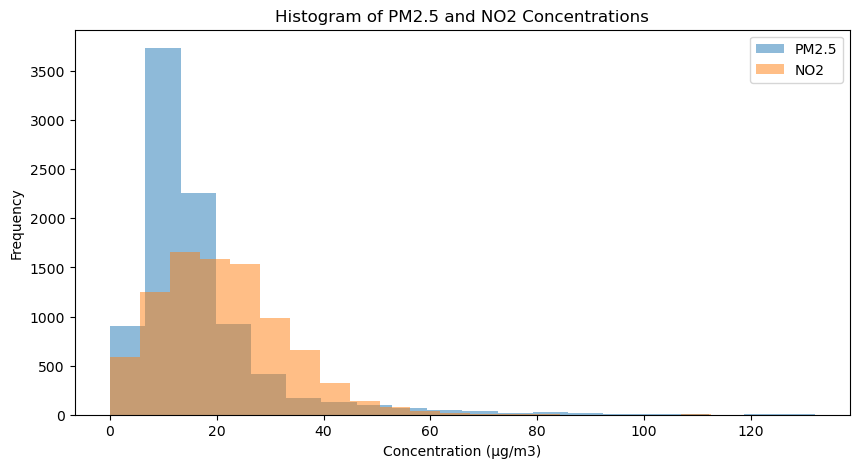

In [5]:
#Examination of data for normal distribution
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
plt.hist(who_aq_dropped[column_PM25], bins=20, alpha=0.5, label='PM2.5')
plt.hist(who_aq_dropped[column_NO2], bins=20, alpha=0.5, label='NO2')
plt.xlabel('Concentration (μg/m3)')
plt.ylabel('Frequency')
plt.title('Histogram of PM2.5 and NO2 Concentrations')
plt.legend()
plt.show()


In [11]:
# # Get the tumor volumes data for PM2.5 (μg/m3)
# pm25_data = who_aq_dropped['PM2.5 (μg/m3)']

# # Calculate the IQR and quantitatively determine if there are any potential outliers.
# quartiles = pm25_data.quantile([0.25, 0.5, 0.75])
# lower_quartile = quartiles[0.25]
# upper_quartile = quartiles[0.75]
# iqr = upper_quartile - lower_quartile

# # Determine outliers using upper and lower bounds
# lower_bound = lower_quartile - (1.5 * iqr)
# upper_bound = upper_quartile + (1.5 * iqr)

# outliers = pm25_data[(pm25_data < lower_bound) | (pm25_data > upper_bound)]

# print("Potential outliers for PM2.5 (μg/m3):")
# print(len(outliers))

Potential outliers for PM2.5 (μg/m3):
675


In [7]:
#Average Polluntants by Country Per Year
avg_PM25_byregion_year = who_aq_dropped.groupby(["WHO Region", "Measurement Year"])[column_PM25].mean().round(2)
avg_NO2_byregion_year = who_aq_dropped.groupby(["WHO Region", "Measurement Year"])[column_NO2].mean().round(2)


avgpollutant_summary_by_regionyear = pd.DataFrame({
    "Average PM2.5 Concentration": avg_PM25_byregion_year,
    "Average NO2 Concentration": avg_NO2_byregion_year,
})

avgpollutant_summary_by_regionyear


Average PM2.5 Concentration  \
WHO Region                   Measurement Year                                
African Region               2010                                    38.53   
                             2011                                    47.82   
                             2012                                    29.67   
                             2013                                    24.29   
                             2014                                    22.26   
                             2015                                    20.88   
                             2016                                    25.23   
                             2017                                    16.84   
                             2018                                    23.73   
                             2019                                    18.65   
                             2020                                    21.23   
                             2021                                    21.70   
Eastern Mediterranean Region 2012                                    30.92   
                             2013                                    45.89   
                             2014                                    27.81   
                             2015                                    47.33   
                             2016                                    30.46   
                             2017                                    55.86   
                             2018                                    46.96   
                             2019                                    40.47   
                             2020                                    36.58   
European Region              2010                                    16.84   
                             2011                                    14.58   
                             2012                                    12.73   
                             2013                                    15.22   
                             2014                                    14.17   
                             2015                                    14.04   
                             2016                                    13.28   
                             2017                                    13.67   
                             2018                                    13.42   
                             2019                                    12.01   
                             2020                                     9.01   
Region of the Americas       2010                                    17.60   
                             2011                                    17.92   
                             2012                                    14.43   
                             2013                                    16.41   
                             2014                                    17.09   
                             2015                                    10.17   
                             2016                                     8.57   
                             2017                                     7.70   
                             2018                                     9.51   
                             2019                                     7.43   
South East Asia Region       2013                                    76.25   
                             2014                                    77.17   
                             2015                                    71.88   
                             2016                                    39.05   
                             2017                                    39.99   
                             2018                                    44.80   
                             2019                                    37.93   
Western Pacific Region       2010                                    

In [8]:
#Average Polluntants by Country Per Year
avg_PM25_bycountry_year = who_aq_dropped.groupby(["WHO Country Name", "Measurement Year"])[column_PM25].mean().round(2)
avg_NO2_bycountry_year = who_aq_dropped.groupby(["WHO Country Name", "Measurement Year"])[column_NO2].mean().round(2)


avgpollutant_summary_by_year = pd.DataFrame({
    "Average PM2.5 Concentration": avg_PM25_bycountry_year,
    "Average NO2 Concentration": avg_NO2_bycountry_year,
})

avgpollutant_summary_by_year



Average PM2.5 Concentration  \
WHO Country Name         Measurement Year                                
Albania                  2015                                    13.24   
                         2016                                    21.48   
Australia                2012                                     9.65   
                         2013                                     7.59   
                         2014                                     8.13   
...                                                                ...   
United States of America 2015                                     9.36   
                         2016                                     8.79   
                         2017                                     9.26   
                         2018                                    10.09   
                         2019                                     7.78   

                                           Average NO2 Concentration  
WHO Country Name         Measurement Year                             
Albania                  2015                                   9.57  
                         2016                                  18.65  
Australia                2012                                   7.96  
                         2013                                  12.18  
                         2014                                  11.10  
...                                                              ...  
United States of America 2015                                  16.39  
                         2016                                  15.49  
                         2017                                  15.78  
                         2018                                  14.76  
                         2019                                  15.04  

[419 rows x 2 columns]

In [9]:
#Highest Concentration of Pollutants by Country/Year
top_polluted_country = avgpollutant_summary_by_year.sort_values(by='Average PM2.5 Concentration', ascending=False)
top_polluted_country.head(5)

Average PM2.5 Concentration  \
WHO Country Name Measurement Year                                
Mongolia         2011                                   132.00   
                 2012                                   106.00   
China            2013                                   101.22   
Bangladesh       2015                                    78.17   
                 2014                                    77.17   

                                   Average NO2 Concentration  
WHO Country Name Measurement Year                             
Mongolia         2011                                  49.00  
                 2012                                  50.00  
China            2013                                  58.67  
Bangladesh       2015                                  40.14  
                 2014                                  37.40

In [10]:
#Lowest Concentration of Pollutants by Country/Year
bottom_polluted_country = avgpollutant_summary_by_year.sort_values(by='Average PM2.5 Concentration', ascending=False)
bottom_polluted_country.tail(5)

Average PM2.5 Concentration  \
WHO Country Name Measurement Year                                
Finland          2017                                     4.63   
Estonia          2019                                     4.60   
                 2017                                     4.55   
Iceland          2018                                     4.33   
                 2019                                     3.99   

                                   Average NO2 Concentration  
WHO Country Name Measurement Year                             
Finland          2017                                  14.88  
Estonia          2019                                   5.58  
                 2017                                   5.51  
Iceland          2018                                   6.57  
                 2019                                   5.55